In [1]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
%matplotlib widget

In [4]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/Good"

In [5]:
folders = glob(pathToData+"*/*")
folders

['/home/alan/Documents/LAB/CSHL/Data/Good/20240617_LTP',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240614_Slice_evoked',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240612_Slice_day_1',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240607_K+channel',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel',
 '/home/alan/Documents/LAB/CSHL/Data/Good/juliana - striatum',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240611_SingleChannel']

In [8]:
files = glob(folders[3]+"/*.abf")
files

['/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0003.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0004.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0005.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/cell001_Na_IV_curve.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0006.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0000.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0001.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0002.abf']

In [9]:
protocol = []
for f in files:
    rec = pyabf.ABF(f)
    protocol.append(rec.protocol)
protocol

['Na IV Curve',
 'Na IV Curve',
 'Steady State Inactivation',
 'Na IV Curve',
 'Recovery from Inactivation Na',
 'Na IV Curve',
 'Steady State Inactivation',
 'Na IV Curve']

In [11]:
f = files[0]
rec = pyabf.ABF(f)
rec

ABF (v2.9) with 2 channels (pA, mV), sampled at 50.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.27 minutes, recorded with protocol "Na IV Curve". path=/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0003.abf

In [12]:
rec.headerText

'\nABF Class Methods\nabf.getAllXs()\nabf.getAllYs()\nabf.launchInClampFit()\nabf.saveABF1()\nabf.setSweep()\nabf.sweepD()\n\nABF Class Variables\nabfDateTime = 2024-06-07 17:09:56.444000\nabfDateTimeString = 2024-06-07T17:09:56.444\nabfFileComment =\nabfFilePath = /home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel/2024_06_07_0003.abf\nabfFolderPath = /home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel\nabfID = 2024_06_07_0003\nabfVersion = {\'major\': 2, \'minor\': 9, \'bugfix\': 0, \'build\': 0}\nabfVersionString = 2.9.0.0\nadcNames = [\'Im_scaled\', \'10_Vm\']\nadcUnits = [\'pA\', \'mV\']\nchannelCount = 2\nchannelList = [0, 1]\ncreator = Clampex 11.2.2.17\ncreatorVersion = {\'major\': 11, \'minor\': 2, \'bugfix\': 2, \'build\': 17}\ncreatorVersionString = 11.2.2.17\ndacNames = [\'V_clamp\', \'Cmd 1\']\ndacUnits = [\'mV\', \'mV\']\ndata = [[ -289.917   -289.917   -291.748  ... -1127.0142 -1124.8779 -1125.1831]\n[  -99.8535   -99.8535   -99.884  ...   -99.884    -99.

In [13]:
rec.data.shape

(2, 149500)

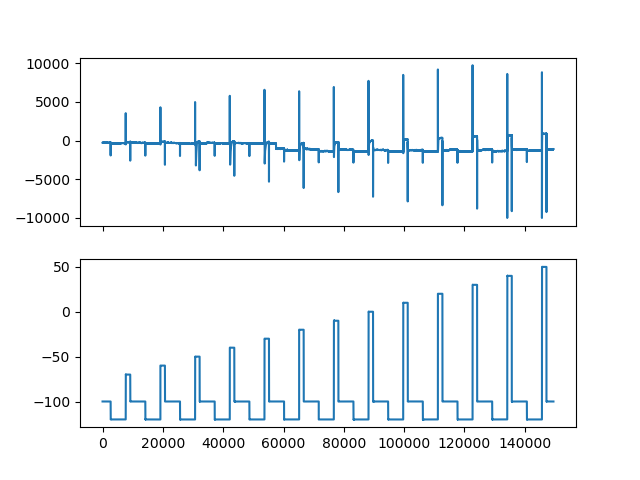

In [14]:
fullData = rec.data
fig,ax = plt.subplots(2,sharex=True)
ax[0].plot(fullData[0])
ax[1].plot(fullData[1])

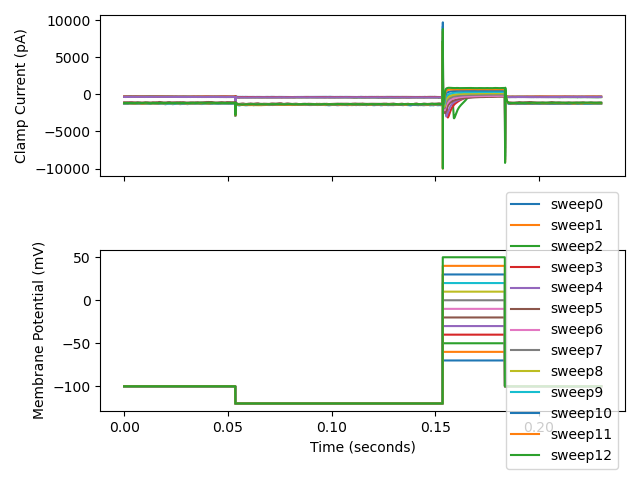

In [16]:
fig,ax = plt.subplots(2,sharex=True)
for swpNB in rec.sweepList:
    rec.setSweep(swpNB)
    ax[0].plot(rec.sweepX,rec.sweepY)
    ax[1].plot(rec.sweepX,rec.sweepC,label=f"sweep {swpNB}")
# labels and legends
ax[1].set_xlabel(rec.sweepLabelX)
ax[0].set_ylabel(rec.sweepLabelY)
ax[1].set_ylabel(rec.sweepLabelC)
ax[1].legend(loc="right")
fig.tight_layout()

In [17]:
def plot_swps(file,legend=False):
    rec = pyabf.ABF(f)
    fig,ax = plt.subplots(2,sharex=True)
    for swpNB in rec.sweepList:
        rec.setSweep(swpNB)
        ax[0].plot(rec.sweepX,rec.sweepY)
        ax[1].plot(rec.sweepX,rec.sweepC,label=f"sweep:{swpNB}")
    # labels and legends
    ax[1].set_xlabel(rec.sweepLabelX)
    ax[0].set_ylabel(rec.sweepLabelY)
    ax[1].set_ylabel(rec.sweepLabelC)
    if legend:
        ax[1].legend(loc="right")
    fig.tight_layout()

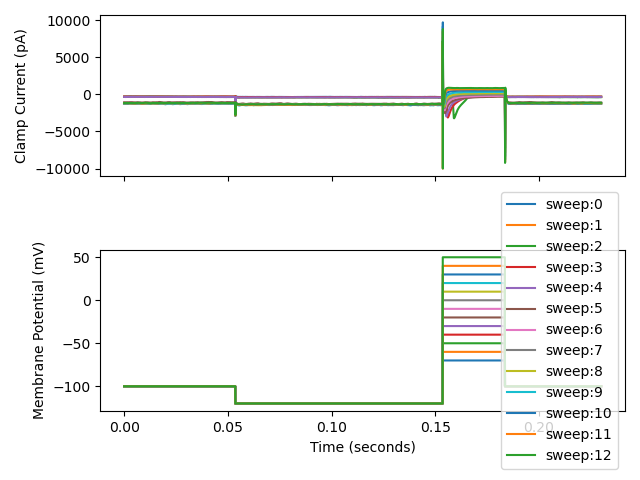

In [18]:
plot_swps(f,legend=True)

### Extract the raw data we want

In [19]:
rec = pyabf.ABF(f)
swps = []
for swpNB in rec.sweepList:
    rec.setSweep(swpNB)
    swps.append((rec.sweepY,rec.sweepC))
swps = np.array(swps)
swp_time = rec.sweepX

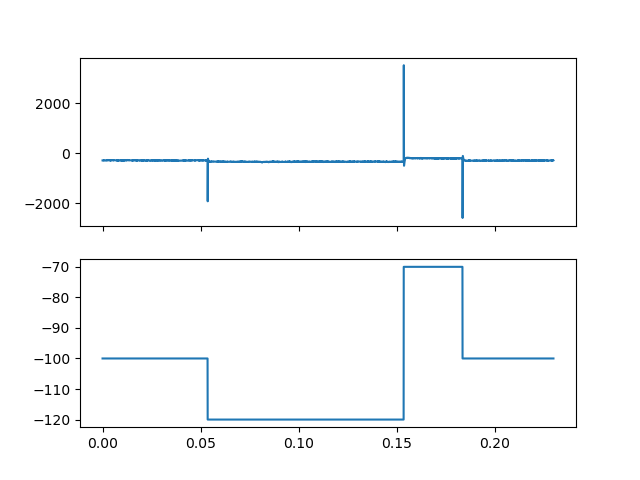

In [20]:
plt.close("all")
fig,ax = plt.subplots(2,sharex=True)
ax[0].plot(swp_time,swps[0,0])
ax[1].plot(swp_time,swps[0,1])

In [21]:
dt = swp_time[1]
sampling_rate = 1/dt
print(f'sampling_period = {dt}')
print(f'sampling_rate = {sampling_rate}')

sampling_period = 2e-05
sampling_rate = 49999.99999999999


In [22]:
def get_sweeps(f):
    rec = pyabf.ABF(f)
    swps = []
    for swpNB in rec.sweepList:
        rec.setSweep(swpNB)
        swps.append((rec.sweepY,rec.sweepC))
    swps = np.array(swps)
    swp_time = rec.sweepX
    dt = swp_time[1] 
    return swps, swp_time, 1/dt

In [23]:
swps, time, sr = get_sweeps(f)
print(f'All sweeps numpy array shape : {swps.shape}')
print(f'time array shape : {swp_time.shape}')
print(f'Sampling rate = {sr} Hz')

All sweeps numpy array shape : (13, 2, 11500)
time array shape : (11500,)
Sampling rate = 49999.99999999999 Hz


### Lets cut and extract parts of recording that we are interested in :

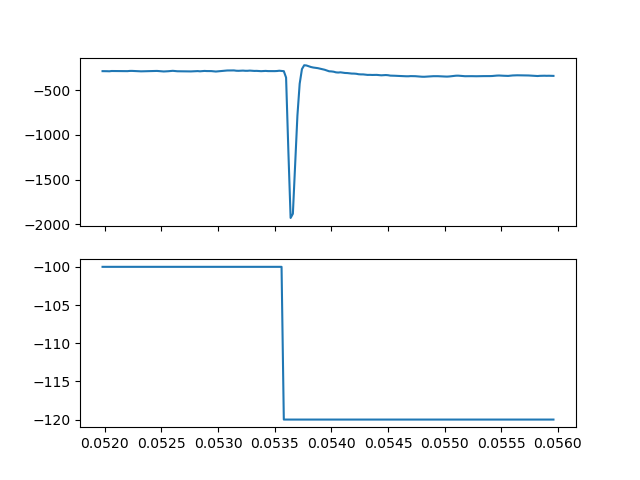

In [28]:
swpY0 = swps[0,0]
swpC0 = swps[0,1]
start = 0.052 # in seconds
end = 0.056
i_start = int(start * sr)
i_end = int(end * sr)
fig,ax = plt.subplots(2,sharex=True)
cutY = swpY0[i_start:i_end]
cutC = swpC0[i_start:i_end]
cutTime = swp_time[i_start:i_end]
ax[0].plot(cutTime,cutY)
ax[1].plot(cutTime,cutC)